### Calculation of Relative Humidity from ERA5 dataset

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import glob
from datetime import datetime
import warnings

warnings.simplefilter("ignore")

## Relative himidity - hourly - 2020/04 -2021/03

In [2]:
path_init  = '/g/data/rt52/era5/pressure-levels/reanalysis/r/2020/r_era5_oper_pl_20200401-20200430.nc'
path_final = '/g/data/rt52/era5/pressure-levels/reanalysis/r/2021/r_era5_oper_pl_20210301-20210331.nc'

In [3]:
import xarray as xr
import glob
from datetime import datetime

all_files = sorted(glob.glob("/g/data/rt52/era5/pressure-levels/reanalysis/r/202[0-1]/r_era5_oper_pl_202*.nc"))

# Filter only files between April 2020 and March 2021
files = [
    f for f in all_files
    if datetime.strptime(f.split("_")[-1].split(".")[0][:8], "%Y%m%d") >= datetime(2020, 4, 1)
    and datetime.strptime(f.split("_")[-1].split(".")[0][:8], "%Y%m%d") <= datetime(2021, 3, 31)
]

#loadingggg
ds = xr.open_mfdataset(
    files,
    combine='by_coords',
    parallel=True
    # chunks={'time': 24, 'lat': 180, 'lon': 360}  # Optional chunking for Dask
)


In [4]:
ds

<xarray.Dataset> Size: 3TB
Dimensions:    (time: 8760, level: 37, latitude: 721, longitude: 1440)
Coordinates:
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int32 148B 1 2 3 5 7 10 20 ... 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 70kB 2020-04-01 ... 2021-03-31T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float64 3TB dask.array<chunksize=(1, 1, 81, 180), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-15 20:51:20 UTC+1100 by era5_replication_tools-1.7....
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 pressure-levels oper relative_humidity 20200401-20200430

In [5]:
r_subset = ds['r'].sel(
    latitude=slice(10, -10),    # Note: decreasing because ERA5 latitudes go from 90 to -90
    longitude=slice(100, 149)
)


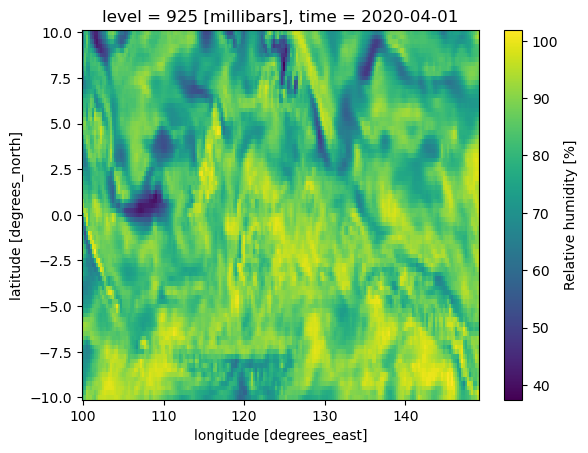

In [6]:
r_subset[0,33,:,:].plot()

In [7]:
print(r_subset)

<xarray.DataArray 'r' (time: 8760, level: 37, latitude: 81, longitude: 197)> Size: 41GB
dask.array<getitem, shape=(8760, 37, 81, 197), dtype=float64, chunksize=(1, 1, 77, 140), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 788B 100.0 100.2 100.5 ... 148.5 148.8 149.0
  * latitude   (latitude) float32 324B 10.0 9.75 9.5 9.25 ... -9.5 -9.75 -10.0
  * level      (level) int32 148B 1 2 3 5 7 10 20 ... 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 70kB 2020-04-01 ... 2021-03-31T23:00:00
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity


In [8]:
r_600_1000 = r_subset.sel(level=slice(600, 1000))

In [9]:
r_600_1000)

<xarray.DataArray 'r' (time: 8760, level: 14, latitude: 81, longitude: 197)> Size: 16GB
dask.array<getitem, shape=(8760, 14, 81, 197), dtype=float64, chunksize=(1, 1, 77, 140), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 788B 100.0 100.2 100.5 ... 148.5 148.8 149.0
  * latitude   (latitude) float32 324B 10.0 9.75 9.5 9.25 ... -9.5 -9.75 -10.0
  * level      (level) int32 56B 600 650 700 750 775 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 70kB 2020-04-01 ... 2021-03-31T23:00:00
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity


In [10]:
r_700 = r_600_1000.sel(level=700).compute()

In [15]:
print(r_700)

<xarray.DataArray 'r' (time: 8760, latitude: 81, longitude: 197)> Size: 1GB
array([[[ 31.61607375,  32.9361662 ,  34.7427792 , ...,  25.6091666 ,
          26.69897264,  26.77032899],
        [ 33.09185278,  33.93191161,  35.51796863, ...,  27.74012664,
          26.96169375,  24.73991653],
        [ 34.60006651,  35.08658706,  36.12125412, ...,  23.22845933,
          19.77416337,  16.69610997],
        ...,
        [ 74.59205637,  77.11547633,  77.50793625, ...,  96.84875016,
          99.52136976,  98.21100772],
        [ 78.51341207,  78.77613317,  77.62794465, ...,  98.03261685,
          99.28135295,  96.41412513],
        [ 78.05932621,  77.89066575,  77.12196327, ..., 100.64036704,
         101.10418331,  98.61319805]],

       [[ 32.83561862,  34.08759819,  35.91042854, ...,  25.79404441,
          27.13035421,  27.2081975 ],
        [ 34.20760659,  34.84332679,  36.4845228 , ...,  28.01906509,
          27.47740554,  25.41455837],
        [ 35.79366361,  35.6412205 ,  36.7926

In [20]:
r700_spatial_mean = r_700.mean(dim=['latitude', 'longitude'])
r700_spatial_mean

<xarray.DataArray 'r' (time: 8760)> Size: 70kB
array([66.70922957, 66.25024426, 65.80782124, ..., 73.71377325,
       74.27798364, 74.18093452])
Coordinates:
    level    int32 4B 700
  * time     (time) datetime64[ns] 70kB 2020-04-01 ... 2021-03-31T23:00:00

In [21]:
r700_spatial_mean.to_netcdf(
    "/scratch/nf33/gs5098/data/r_700_mean_100_149_-10_10.nc",
    encoding={"r": {"dtype": "float32"}},
    format="NETCDF4"
)

In [17]:
# r_700.to_netcdf(
#     "/scratch/nf33/gs5098/data/r_700_100_149_-10_10.nc",
#     encoding={"r": {"dtype": "float32"}},
#     format="NETCDF4"
# )
